In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv('datasets/Iris.csv')
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,110,7.2,3.6,6.1,2.5,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [44]:
encode = LabelEncoder()
data['Species'] = encode.fit_transform(data['Species'])
data['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [45]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
data.drop('Id',inplace=True,axis=1)

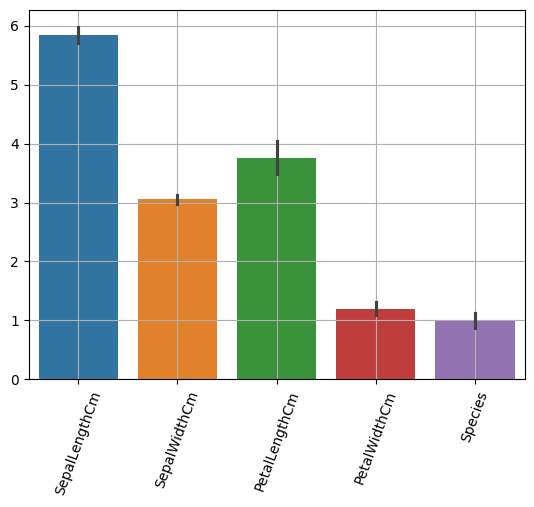

In [111]:
sns.barplot(data)
plt.xticks(rotation=70)
plt.grid()
plt.show()

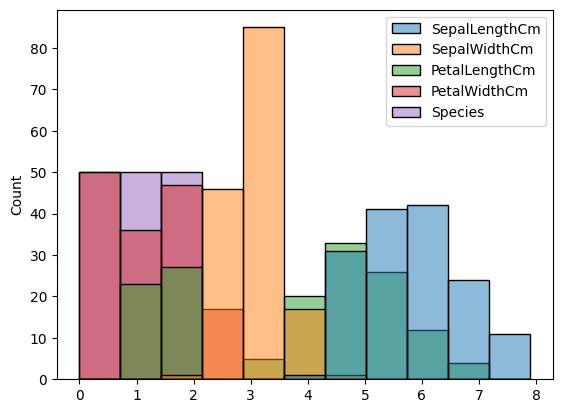

In [121]:
sns.histplot(data)
plt.show()

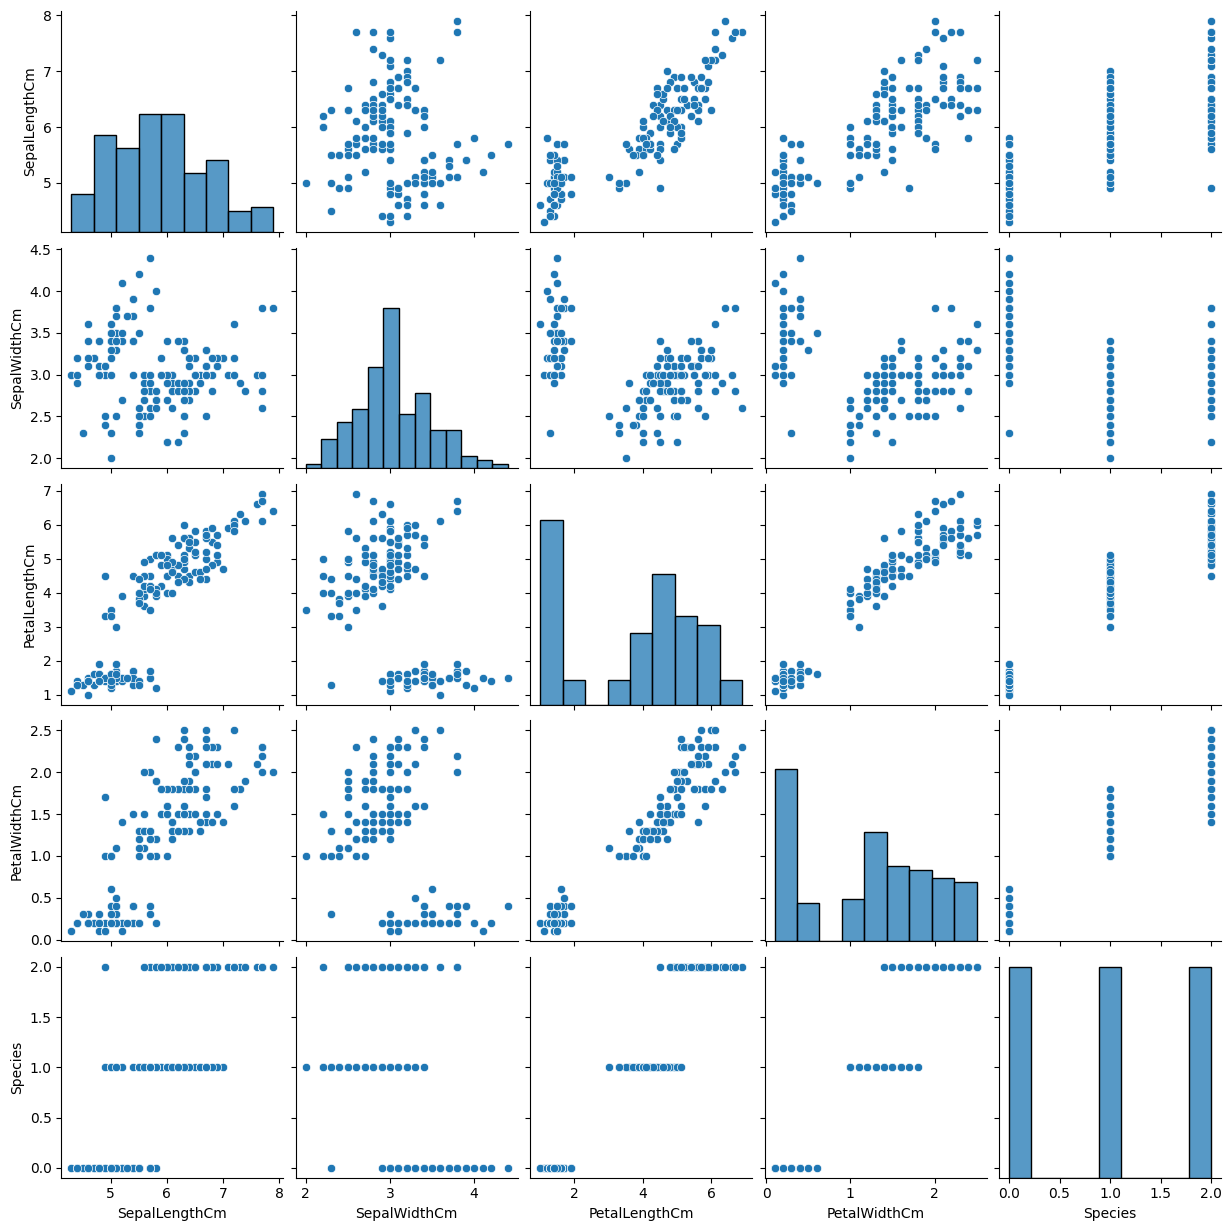

In [48]:
sns.pairplot(data,diag_kind='auto',kind='scatter')
plt.show()

In [67]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [252]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


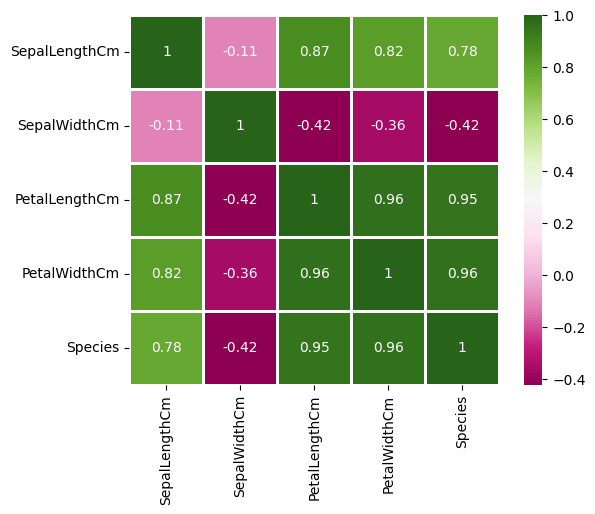

In [81]:
sns.heatmap(data.corr(),annot=True,linewidths=1,square=True,cmap='PiYG')
plt.show()

In [58]:
x_data = data.drop('Species',axis=1).to_numpy()
y_data = data['Species'].to_numpy()

`Standartization`

In [60]:
scaler = StandardScaler()
x_data_norm = scaler.fit_transform(x_data)

`Split data`

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_data_norm,y_data,test_size=0.3,random_state=32)

In [86]:
print("TRAIN DATA")
print(x_train.shape)
print(y_train.shape)

TRAIN DATA
(105, 4)
(105,)


In [87]:
print('TEST DATA')
print(x_test.shape)
print(y_test.shape)

TEST DATA
(45, 4)
(45,)


`LogisticRegression`

In [88]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [89]:
y_lr_pred = lr_model.predict(x_test)

In [90]:
print(classification_report(y_lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



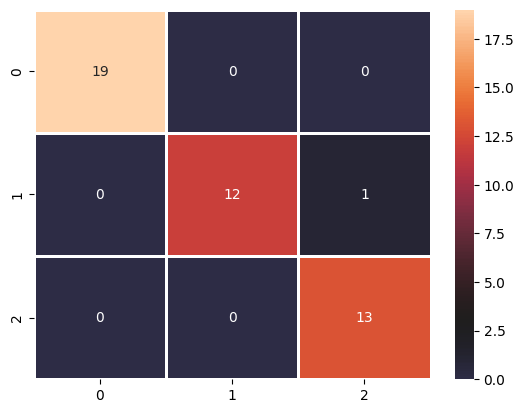

In [97]:
sns.heatmap(confusion_matrix(y_lr_pred,y_test),annot=True,center=3,linewidths=2)
plt.show()

In [136]:
result_lr =  cross_val_score(lr_model,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(result_lr)
print((-result_lr).mean())
print((-result_lr).std(ddof=0))

[-0.33333333 -0.11111111 -0.         -0.         -0.        ]
0.08888888888888888
0.12957670877434002


`Naive Bayes`

In [123]:
GBN = GaussianNB()
GBN.fit(x_train,y_train)

GaussianNB()

In [124]:
G_predict = GBN.predict(x_test)

In [125]:
print(classification_report(G_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [126]:
confusion_matrix(G_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

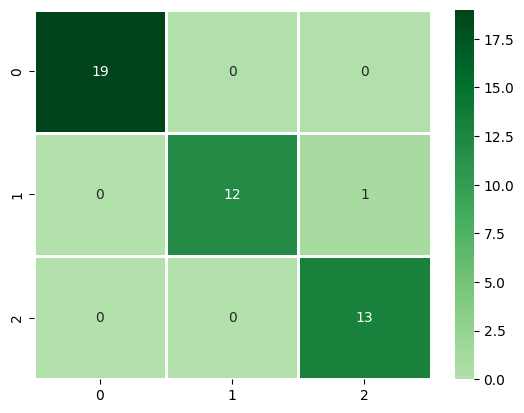

In [129]:
sns.heatmap(confusion_matrix(G_predict,y_test),annot=True,linewidths=1,cmap='Greens',center=5)
plt.show()

In [137]:
result_GB =  cross_val_score(GBN,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(result_GB)
print((-result_GB).mean())
print((-result_GB).std(ddof=0))

[-0.22222222 -0.11111111 -0.         -0.         -0.        ]
0.06666666666666667
0.08888888888888889


`Support Vector Machine`

In [138]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [139]:
svc_predict = svc_model.predict(x_test)

In [140]:
print(classification_report(svc_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



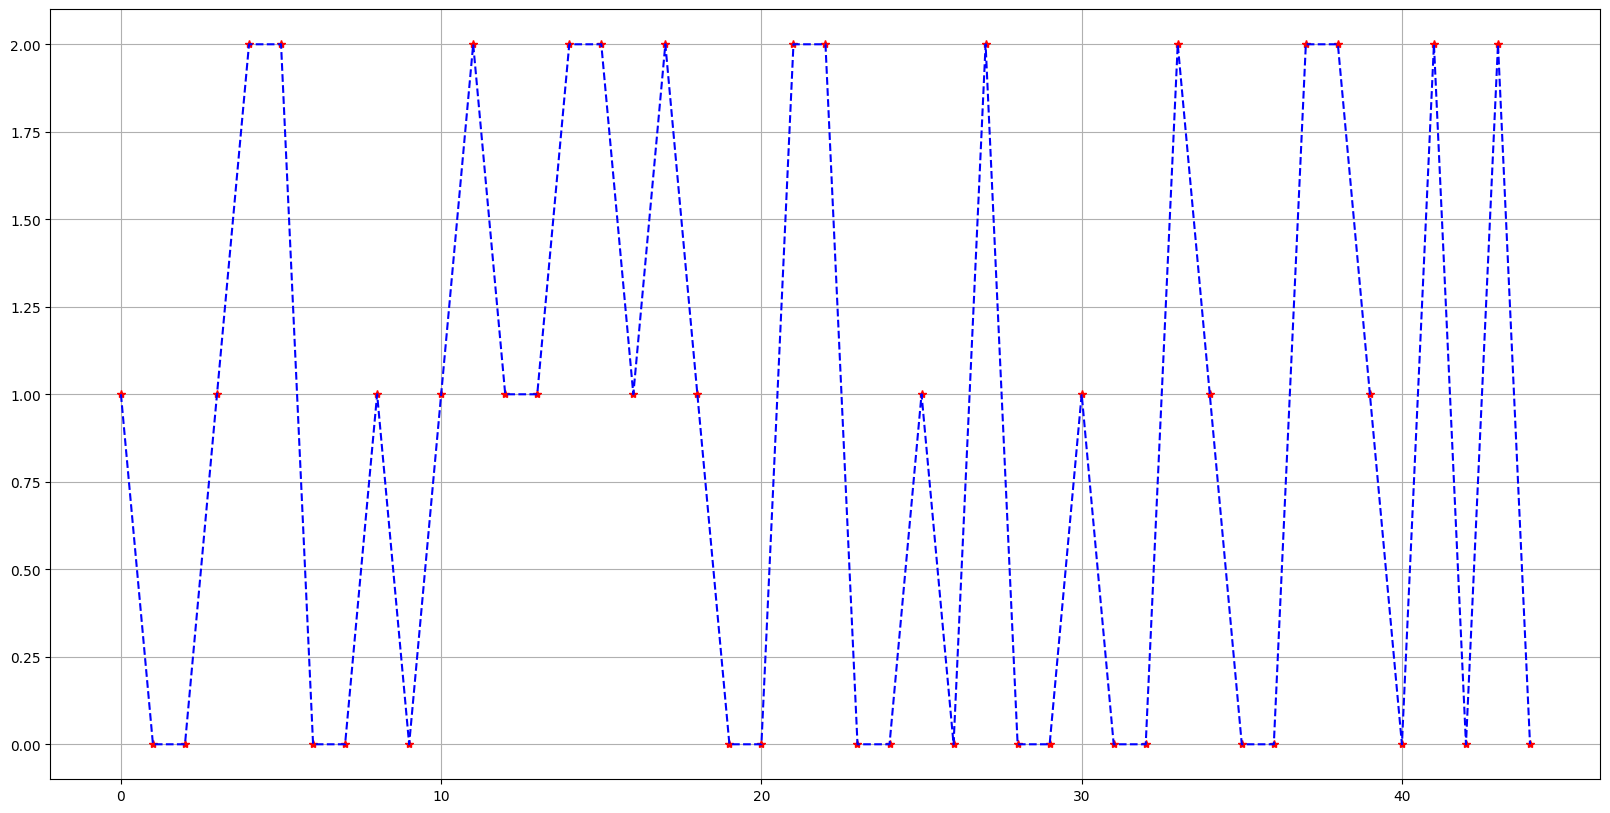

In [174]:
plt.figure(figsize=(20,10))
plt.plot(svc_predict,'r*')
plt.plot(y_test,'b--')
plt.grid()
plt.show()

In [141]:
confusion_matrix(svc_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 14]], dtype=int64)

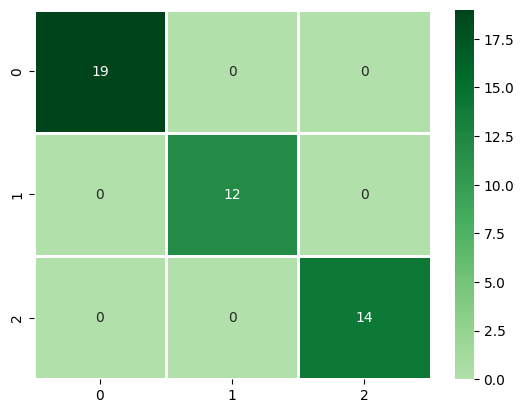

In [142]:
sns.heatmap(confusion_matrix(svc_predict,y_test),annot=True,linewidths=1,cmap='Greens',center=5)
plt.show()

In [176]:
result_scv =  cross_val_score(svc_model,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_scv)
print((-result_scv).mean())
print((-result_scv).std(ddof=0))

[0.11111111 0.11111111 0.         0.11111111 0.        ]
0.06666666666666667
0.05443310539518174


`KNN`

`Choose the best K`

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

In [184]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [185]:
parametr = {'n_neighbors':np.arange(1,31)}
knn_k = GridSearchCV(knn,parametr,cv=10)
knn_k.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [186]:
knn_k.cv_results_['rank_test_score']

array([16, 19,  1,  5,  1, 16, 12,  1, 12,  1, 16, 12, 12,  5,  7,  7,  7,
        7,  7, 20, 20, 20, 23, 25, 25, 24, 25, 25, 30, 29])

In [187]:
knn_k.best_params_

{'n_neighbors': 3}

In [188]:
knn_k.best_score_

0.9618181818181819

`with best K`

In [189]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [190]:
knn_predict = knn.predict(x_test)

In [191]:
print(classification_report(knn_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.86      0.92        14
           2       0.93      1.00      0.96        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.95        45



In [192]:
confusion_matrix(knn_predict,y_test)

array([[18,  0,  0],
       [ 1, 12,  1],
       [ 0,  0, 13]], dtype=int64)

<Axes: >

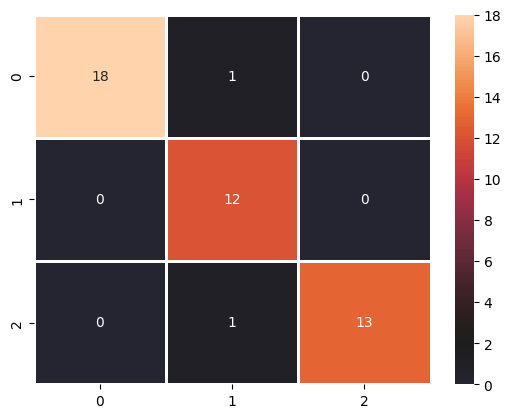

In [193]:
sns.heatmap(confusion_matrix(y_test,knn_predict),annot=True,linewidths=2,center=2)

In [194]:
result_knn =  cross_val_score(svc_model,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_knn)
print((-result_knn).mean())
print((-result_knn).std(ddof=0))

[0.11111111 0.11111111 0.         0.11111111 0.        ]
0.06666666666666667
0.05443310539518174


`Decision Tree`

In [195]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [196]:
dt_predict = dt.predict(x_test)

In [197]:
print(classification_report(dt_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      0.91      0.87        11
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



In [198]:
confusion_matrix(dt_predict,y_test)

array([[19,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 13]], dtype=int64)

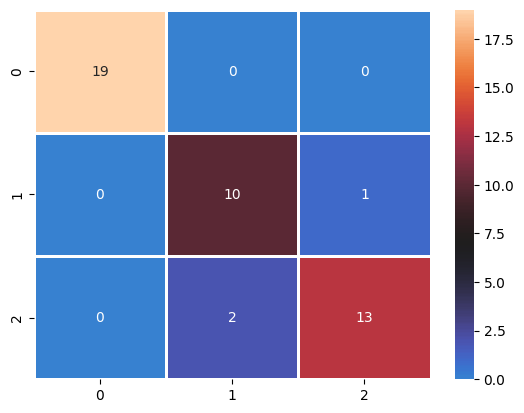

In [201]:
sns.heatmap(confusion_matrix(dt_predict,y_test),annot=True,linewidths=2,center=7)
plt.show()

In [204]:
result_dt =  cross_val_score(svc_model,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_dt)
print((-result_dt).mean())
print((-result_dt).std())

[0.11111111 0.11111111 0.         0.11111111 0.        ]
0.06666666666666667
0.05443310539518174


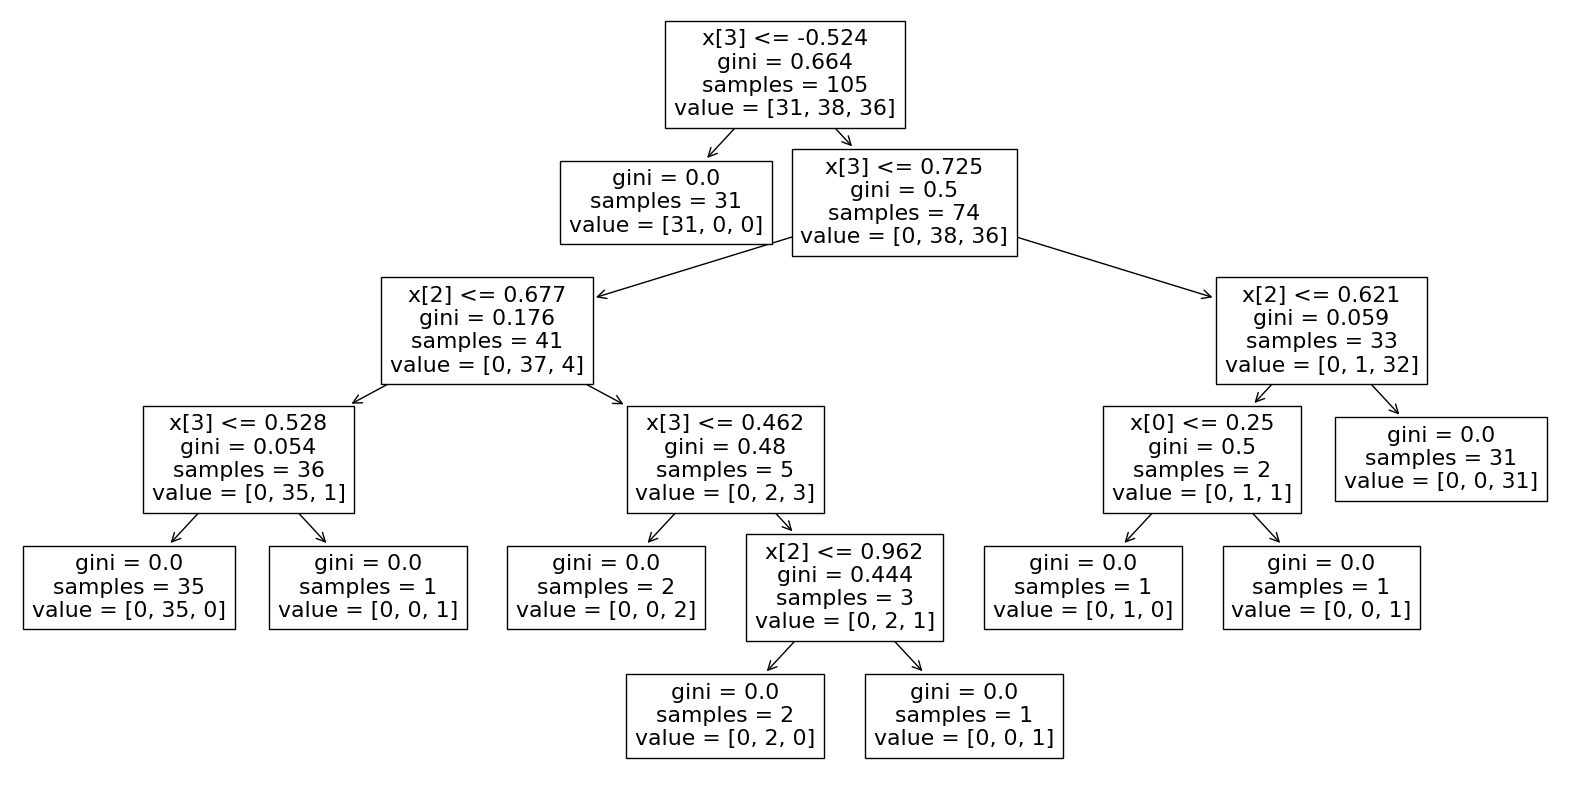

In [214]:
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

`Random Forest`

In [205]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
rf_predict = rf.predict(x_test)

In [207]:
print(classification_report(rf_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [208]:
confusion_matrix(rf_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

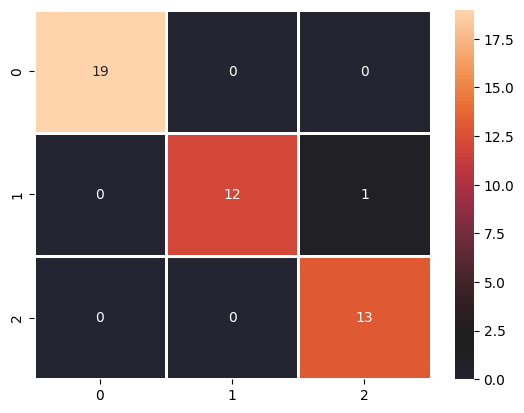

In [210]:
sns.heatmap(confusion_matrix(rf_predict,y_test),annot=True,linewidths=2,center=2)
plt.show()

In [211]:
result_rf =  cross_val_score(rf,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_rf)
print((-result_rf).mean())
print((-result_rf).std())

[0.         0.11111111 0.11111111 0.         0.        ]
0.04444444444444444
0.05443310539518174


In [217]:
len(rf)

100

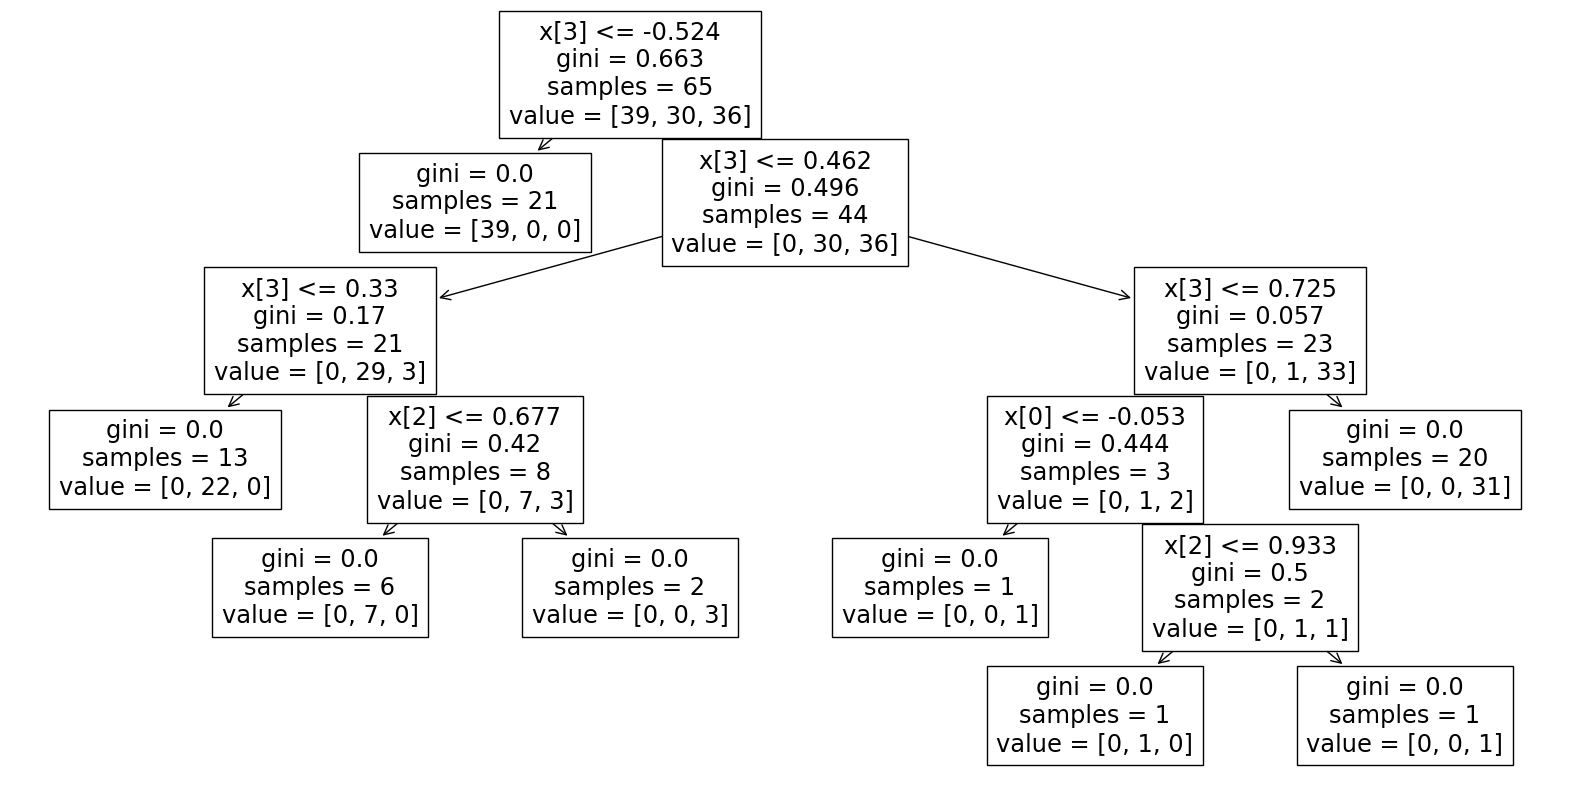

In [216]:
plt.figure(figsize=(20,10))
plot_tree(rf[1])
plt.show()

`Extra Tree`

In [212]:
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)

ExtraTreesClassifier()

In [218]:
ext_predict = ext.predict(x_test)

In [219]:
print(classification_report(ext_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [220]:
confusion_matrix(ext_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 14]], dtype=int64)

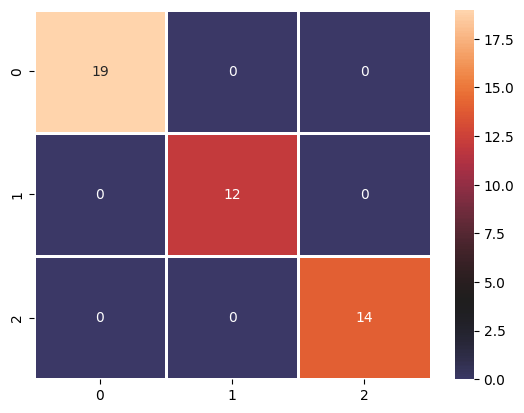

In [222]:
sns.heatmap(confusion_matrix(ext_predict,y_test),annot=True,linewidths=2,center=4)
plt.show()

In [224]:
result_ext =  cross_val_score(ext,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_ext)
print((-result_ext).mean())
print((-result_ext).std())

[0.22222222 0.11111111 0.         0.         0.        ]
0.06666666666666667
0.08888888888888889


In [230]:
len(ext)

100

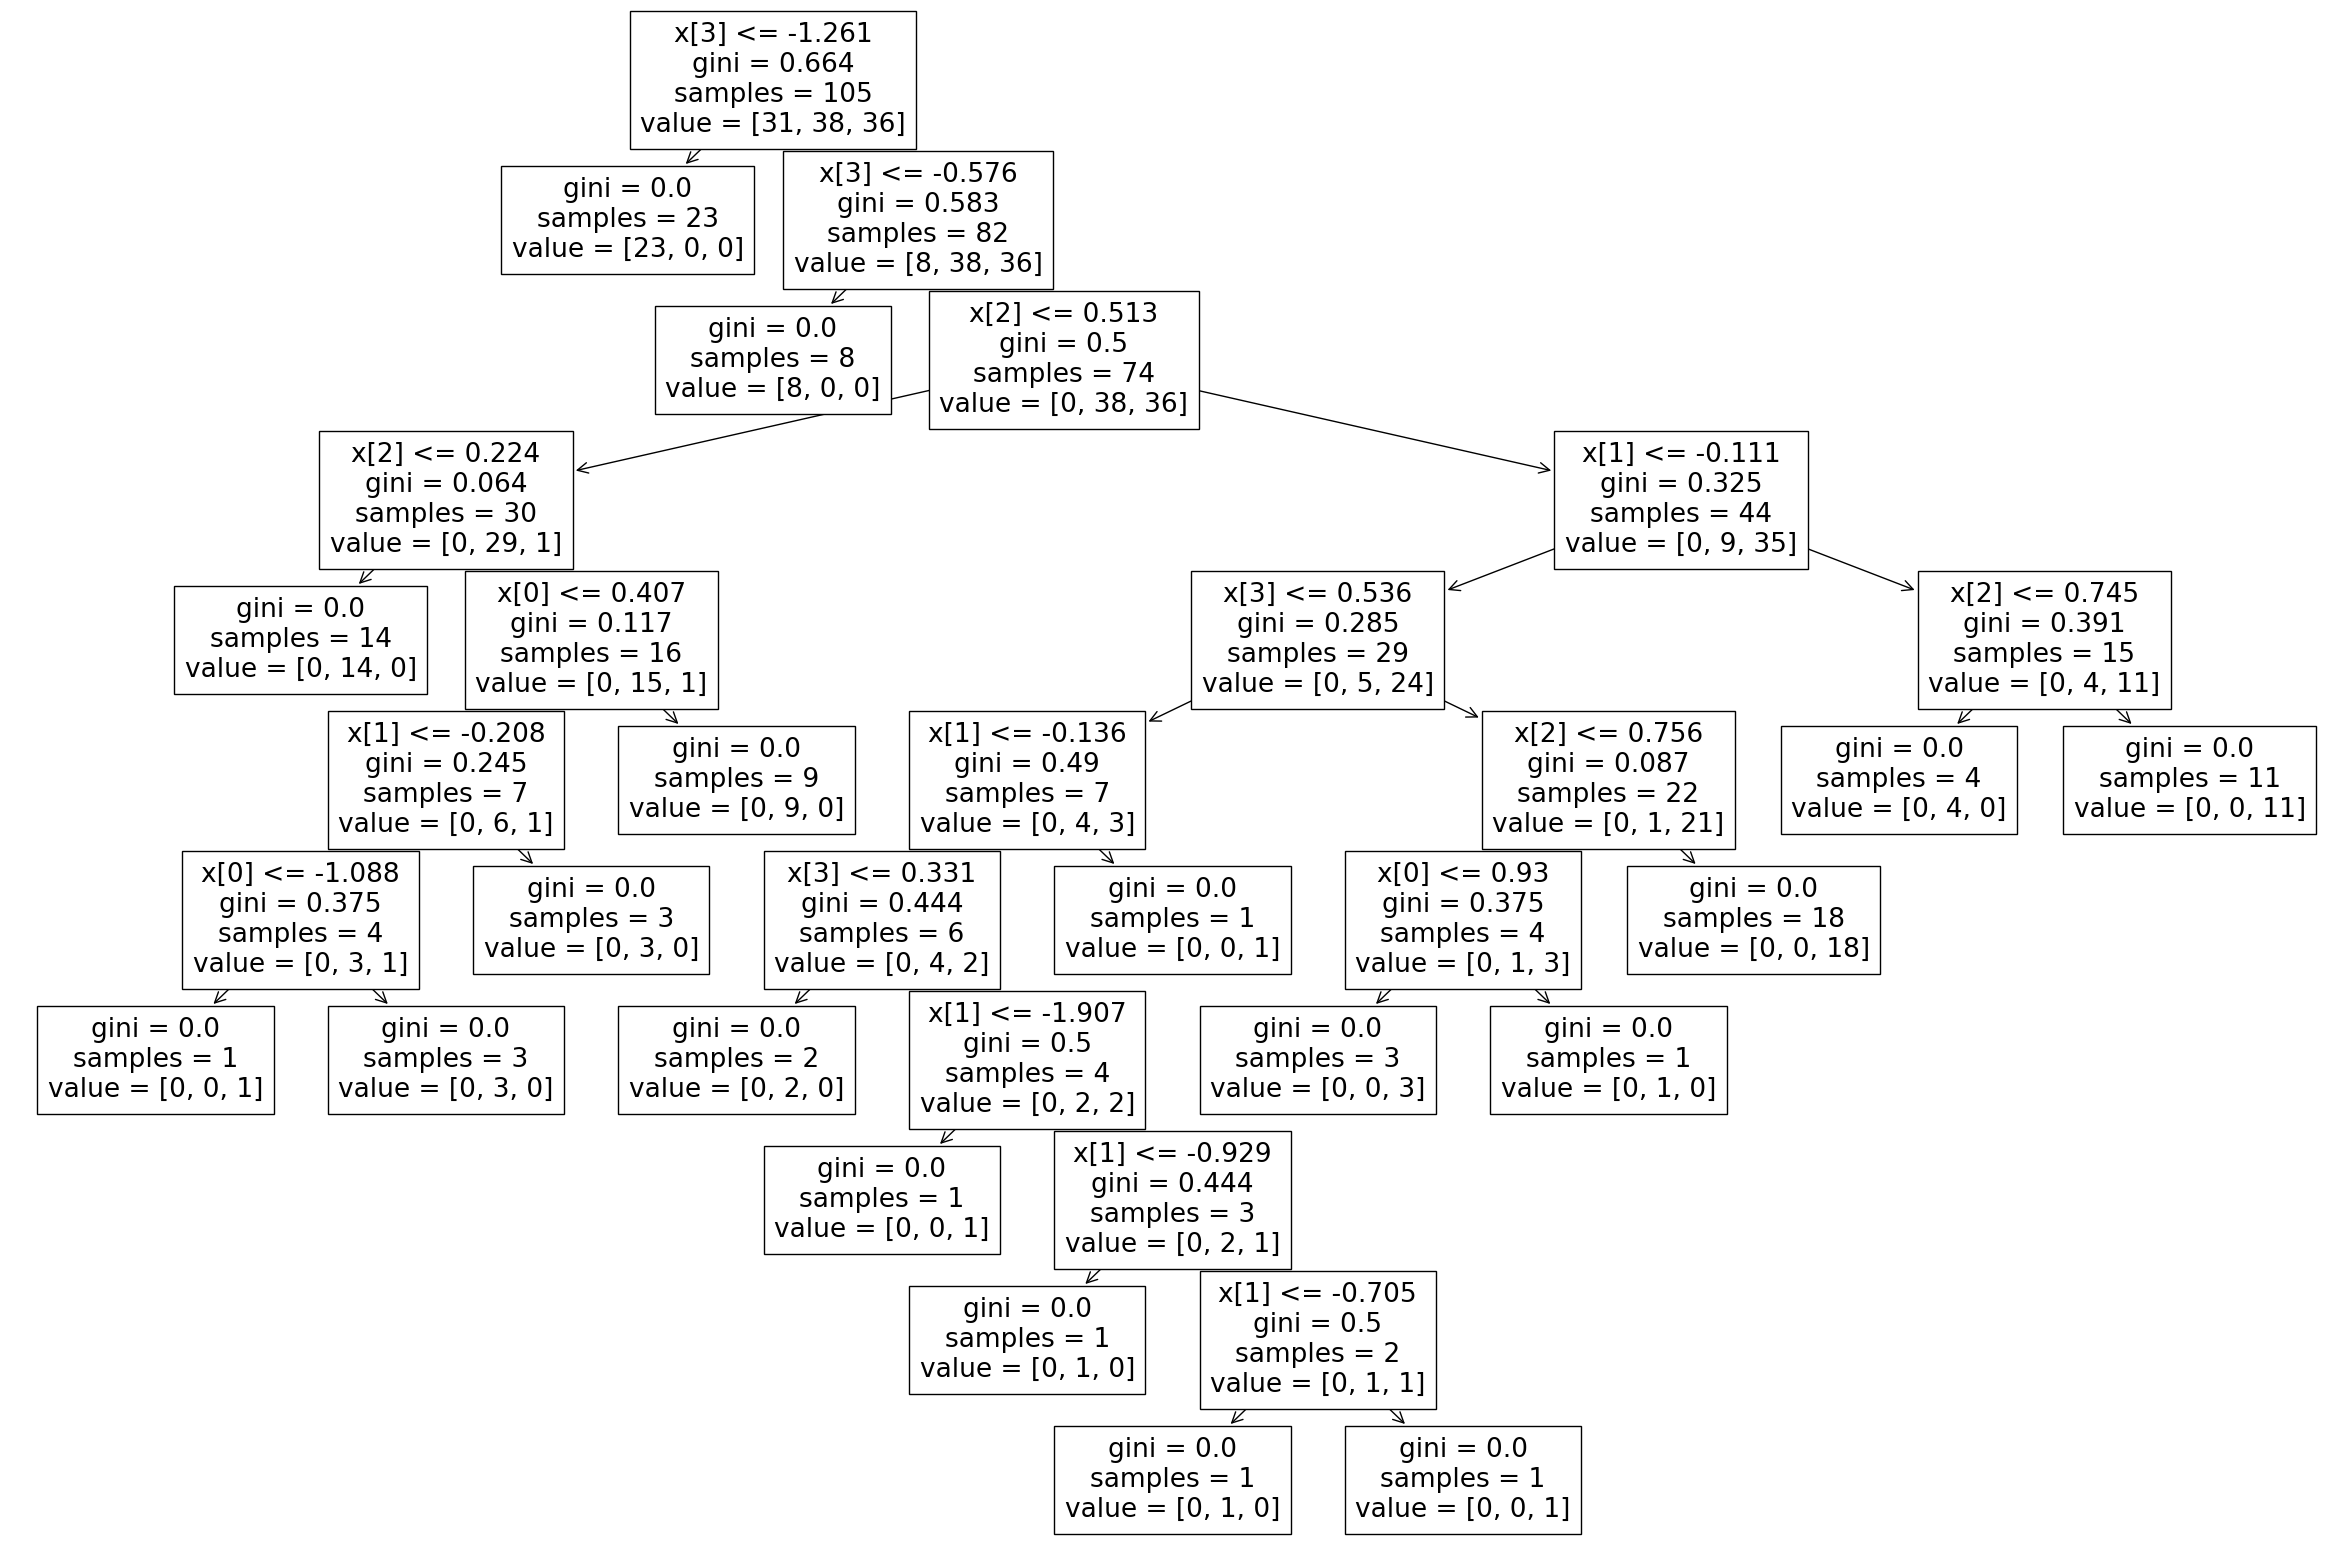

In [232]:
plt.figure(figsize=(30,20))
plot_tree(ext[0])
plt.show()

`Gradient Boosting`

In [233]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [234]:
GB_predict = GB.predict(x_test)

In [235]:
print(classification_report(GB_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [236]:
confusion_matrix(GB_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

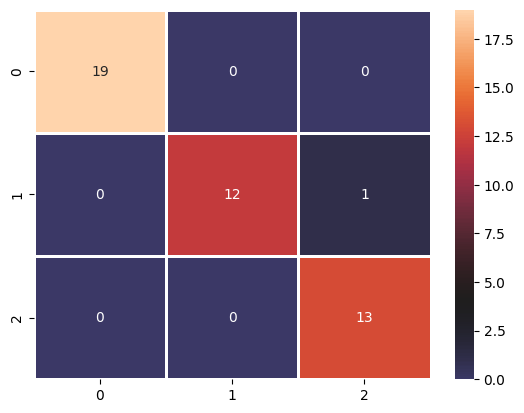

In [237]:
sns.heatmap(confusion_matrix(GB_predict,y_test),annot=True,linewidths=2,center=4)
plt.show()

In [238]:
result_gb =  cross_val_score(GB,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_gb)
print((-result_gb).mean())
print((-result_gb).std())

[0.11111111 0.11111111 0.22222222 0.         0.        ]
0.08888888888888888
0.08314794192830981


`Ada Boosting`

In [239]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)

AdaBoostClassifier()

In [240]:
AB_predict = AB.predict(x_test)

In [241]:
print(classification_report(AB_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [242]:
confusion_matrix(AB_predict,y_test)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

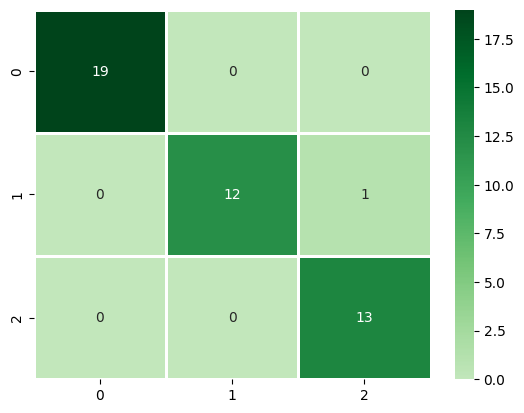

In [246]:
sns.heatmap(confusion_matrix(AB_predict,y_test),annot=True,linewidths=2,cmap='Greens',center=6)
plt.show()

In [247]:
result_ab =  cross_val_score(AB,x_test,y_test,scoring="neg_mean_squared_error",cv=5)
print(-result_ab)
print((-result_ab).mean())
print((-result_ab).std())

[0.11111111 0.11111111 0.22222222 0.         0.        ]
0.08888888888888888
0.08314794192830981


In [251]:
print('LogisticRegression')
print((-result_lr).mean())
print((-result_lr).std(ddof=0))
print()
print('Naive Bayes')
print((-result_GB).mean())
print((-result_GB).std(ddof=0))
print()
print('SVC')
print((-result_scv).mean())
print((-result_scv).std(ddof=0))
print()
print('KNeighborsClassifier')
print((-result_knn).mean())
print((-result_knn).std(ddof=0))
print()
print('DecisionTreeClassifier')
print((-result_dt).mean())
print((-result_dt).std())
print()
print('RandomForestClassifier')
print((-result_rf).mean())
print((-result_rf).std())
print()
print('ExtraTreesClassifier')
print((-result_ext).mean())
print((-result_ext).std())
print()
print("GradientBoostingClassifier")
print((-result_gb).mean())
print((-result_gb).std())
print()
print("AdaBoostClassifier")
print((-result_ab).mean())
print((-result_ab).std())

LogisticRegression
0.08888888888888888
0.12957670877434002

Naive Bayes
0.06666666666666667
0.08888888888888889

SVC
0.06666666666666667
0.05443310539518174

KNeighborsClassifier
0.06666666666666667
0.05443310539518174

DecisionTreeClassifier
0.06666666666666667
0.05443310539518174

RandomForestClassifier
0.04444444444444444
0.05443310539518174

ExtraTreesClassifier
0.06666666666666667
0.08888888888888889

GradientBoostingClassifier
0.08888888888888888
0.08314794192830981

AdaBoostClassifier
0.08888888888888888
0.08314794192830981


### so `RandomForestClassifier` is better than others
